## DIGIRISE INFOLABS INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## ML AND DATASCIENCE INTERNSHIP

### PROBLEM STATEMENT : SIGN LANGUAGE RECOGNITION

Develop a machine learning model that can accurately detect and classify hand signs from input images or video frames. The goal is to provide an automated solution for sign language recognition or gesture-based control systems and to improve accessibility and usability for people with disabilities. Dataset link https://www.kaggle.com/datasets/datamunge/sign-language-mnist

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


#### IMPORTING LIBRARIES

In [2]:
!pip install keras_tuner

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import seaborn as sns
import keras_tuner
import keras
import tensorflow as tf
import gc

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### READING THE DATASETS

In [4]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


#### EXPLORATORY ANALYSIS OF THE DATASET

In [7]:
print(train.shape)
print(test.shape)   

(27455, 785)
(7172, 785)


<Axes: xlabel='label', ylabel='count'>

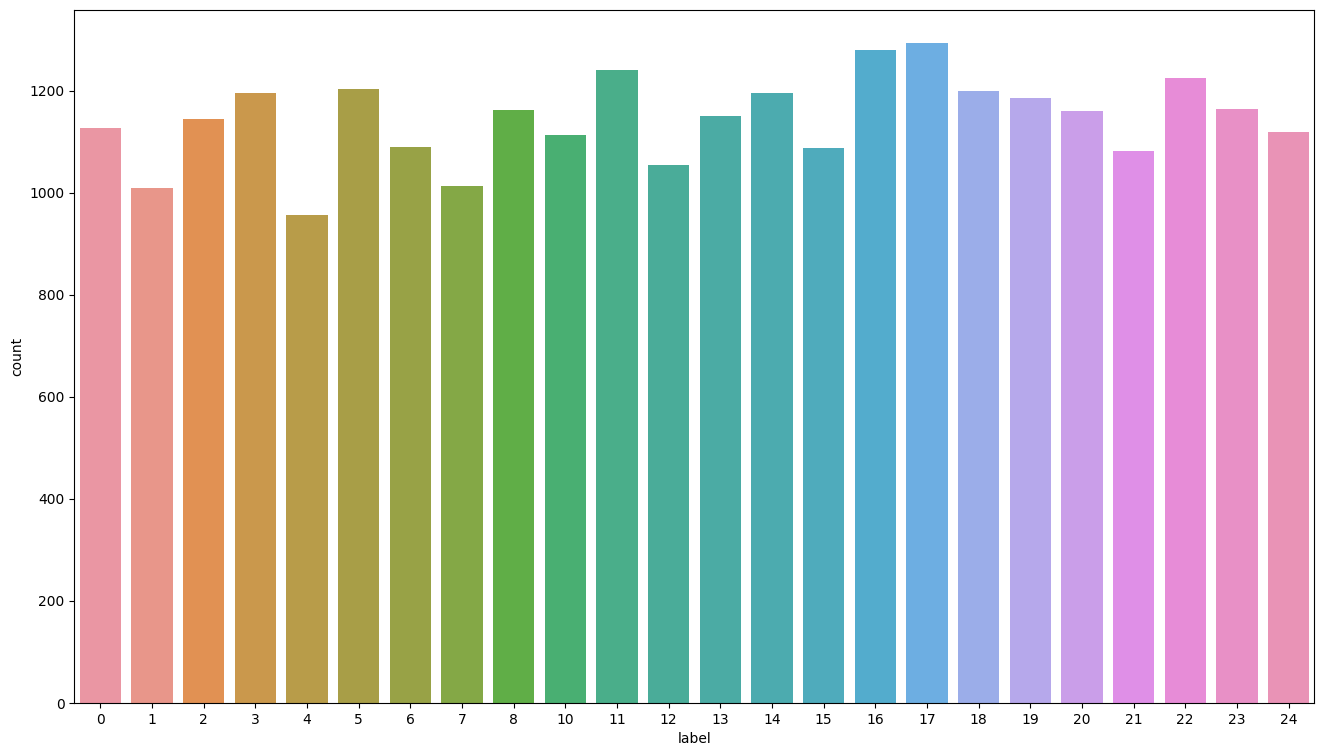

In [8]:
plt.figure(figsize = (16,9))
sns.countplot(train, x = 'label')

<Axes: xlabel='label', ylabel='count'>

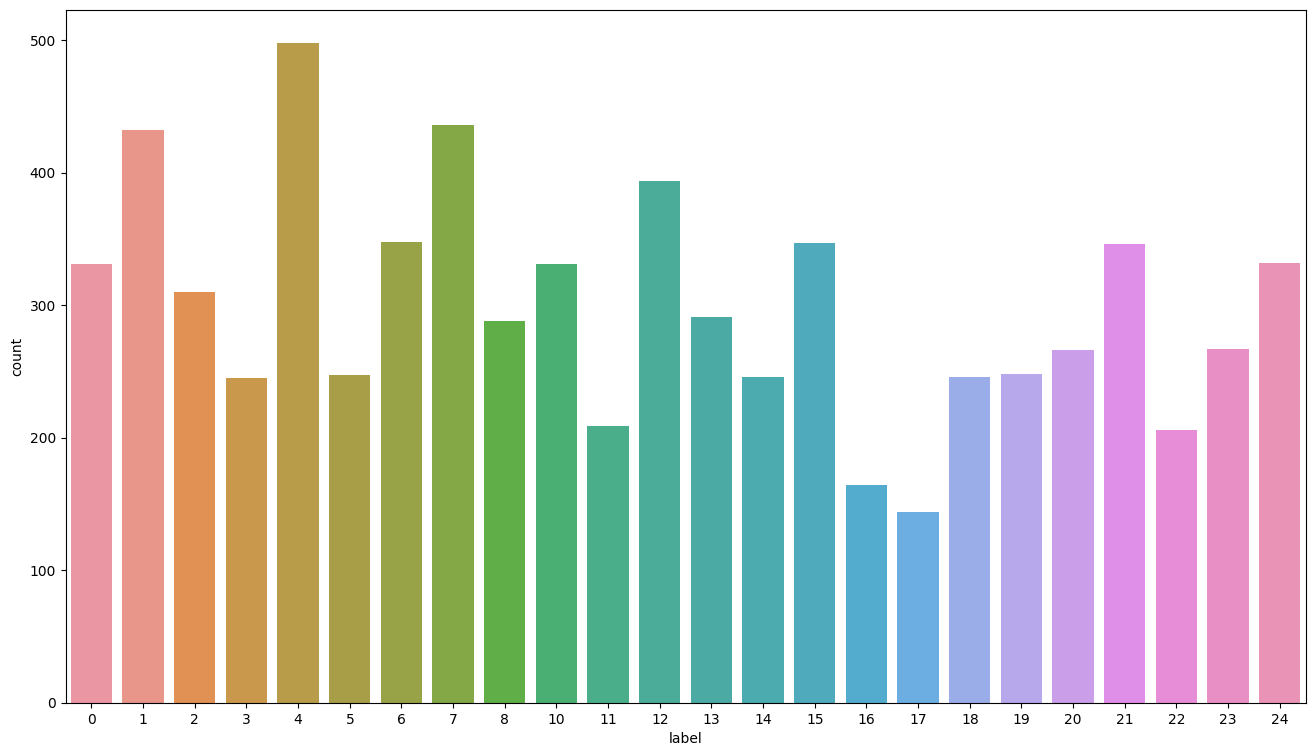

In [9]:
plt.figure(figsize = (16,9))
sns.countplot(test, x = 'label')

#### SEPARATING THE PIXEL DATA AND ALPHABET LABEL

In [10]:
#train['label'] = train['label'].astype(str)
#test['label'] = test['label'].astype(str)

label_train = train['label']
label_test = test['label']
pixel_train = train
pixel_test = test
pixel_train = pixel_train.drop('label', axis = 1)
pixel_test = pixel_test.drop('label', axis = 1)

label_train = np.array(label_train)
label_test = np.array(label_test)
pixel_train = np.array(pixel_train)
pixel_test = np.array(pixel_test)

pixel_train = pixel_train.reshape(27455,28,28,1)
pixel_test = pixel_test.reshape(7172,28,28,1)
gc.collect()

19

In [11]:
print (" The shape of pixel_train is : " + str(pixel_train.shape))
print (" The shape of label_train is : " + str(label_train.shape))
print (" The shape of pixel_test is : " + str(pixel_test.shape))
print (" The shape of label_test is : " + str(label_test.shape))

 The shape of pixel_train is : (27455, 28, 28, 1)
 The shape of label_train is : (27455,)
 The shape of pixel_test is : (7172, 28, 28, 1)
 The shape of label_test is : (7172,)


In [12]:
def show_train_img(int):
    cap = label_train[int]
    pixels = pixel_train[int]
    plt.figure(figsize = (4,4))
    plt.imshow(pixels)
    plt.xlabel(str(cap))
    plt.show
    
def show_test_img(int):
    pixels = pixel_test[int]
    cap = label_test[int]
    plt.figure(figsize = (4,4))
    plt.imshow(pixels)
    plt.xlabel(str(cap))
    plt.show

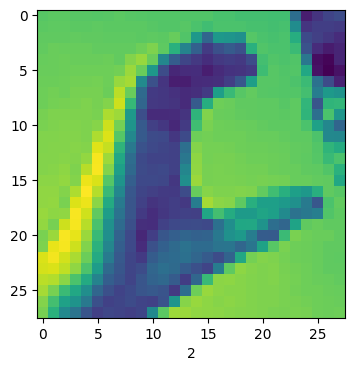

In [13]:
show_train_img(2)

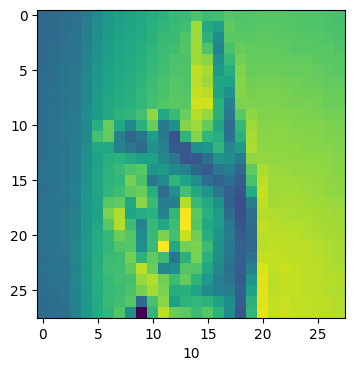

In [14]:
show_test_img(2)

#### DATA SCALING

In [15]:
pixel_train = pixel_train * (1./255)
pixel_test = pixel_test * (1./255)
gc.collect()

3380

In [16]:
x_train = pixel_train
y_train = label_train

x_test = pixel_test
y_test = label_test

#### GETTING THE BEST FIT MODEL

In [17]:
def build_model(hp):
    
    model = keras.models.Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

    model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dense(25,activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

    return model

In [18]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 500, directory='output', project_name="sign_alphabet_recognition")

tuner_search.search(x_train, y_train,epochs = 5, batch_size = 128, validation_split=0.15)

Trial 500 Complete [00h 00m 07s]
val_accuracy: 0.09759650379419327

Best val_accuracy So Far: 0.9589706063270569
Total elapsed time: 00h 55m 43s


In [19]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 192, 'dense_1_activation': 'selu', 'dense_1_kernel_initializer': 'he_normal', 'dropout_1_rate': 0.2, 'dense_2_units': 1016, 'dense_2_activation': 'elu', 'dense_2_kernel_initializer': 'random_normal', 'dropout_2_rate': 0.2, 'dense_3_units': 864, 'dense_3_activation': 'relu', 'dense_3_kernel_initializer': 'glorot_uniform', 'dropout_3_rate': 0.4, 'dense_4_units': 320, 'dense_4_activation': 'elu', 'dense_4_kernel_initializer': 'glorot_normal', 'learning_rate': 0.001}


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7e4df2e22a10>>


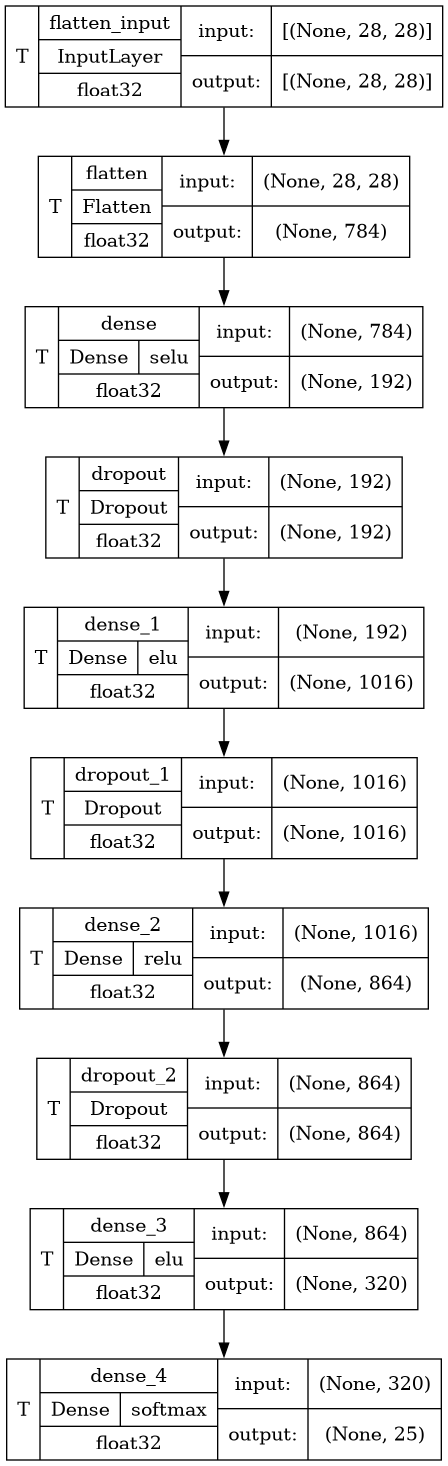

In [20]:
print(model.summary)
model_name='/kaggle/working/sign_alphabet_detector.png'
keras.utils.plot_model(model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

#### FINAL MODEL IMPLEMENTATION

In [21]:
sign_alphabet_detector = model

In [22]:
sign_alphabet_detector.fit(x_train, y_train, epochs = 200, batch_size = 128, validation_split = 0.2)

Epoch 1/200
172/172 [==============================] - 3s 5ms/step - loss: 0.2956 - accuracy: 0.8977 - val_loss: 0.1240 - val_accuracy: 0.9537
Epoch 2/200
172/172 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9223 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 3/200
172/172 [==============================] - 1s 4ms/step - loss: 0.1672 - accuracy: 0.9419 - val_loss: 0.0383 - val_accuracy: 0.9883
Epoch 4/200
172/172 [==============================] - 1s 4ms/step - loss: 0.1462 - accuracy: 0.9501 - val_loss: 0.0366 - val_accuracy: 0.9874
Epoch 5/200
172/172 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9417 - val_loss: 0.1139 - val_accuracy: 0.9561
Epoch 6/200
172/172 [==============================] - 1s 4ms/step - loss: 0.1436 - accuracy: 0.9502 - val_loss: 0.0123 - val_accuracy: 0.9973
Epoch 7/200
172/172 [==============================] - 1s 4ms/step - loss: 0.1392 - accuracy: 0.9532 - val_loss: 0.0087 - val_accuracy: 0.9985

#### EVALUATION OF THE CLASSIFIER

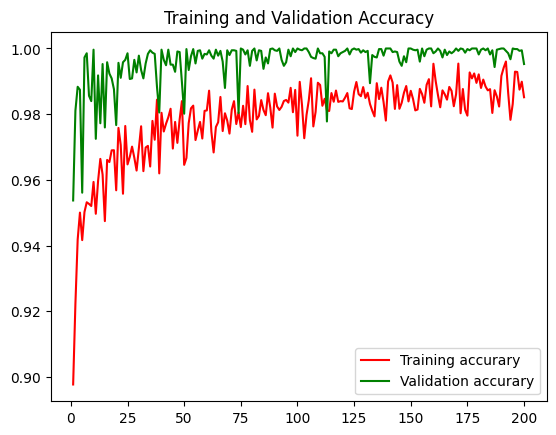

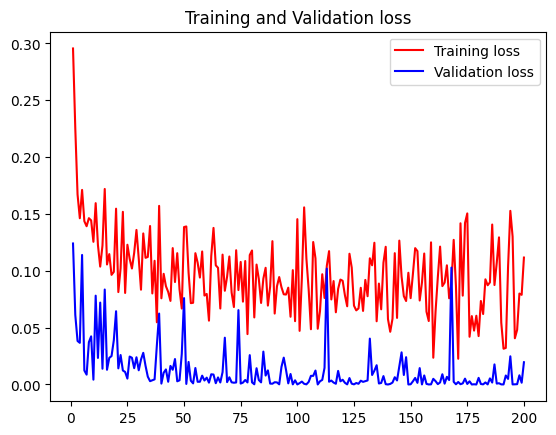

In [23]:
acc=sign_alphabet_detector.history.history['accuracy']
val_acc=sign_alphabet_detector.history.history['val_accuracy']
loss=sign_alphabet_detector.history.history['loss']
val_loss=sign_alphabet_detector.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [24]:
predicted_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
y_predicted = []
y_probability= sign_alphabet_detector.predict(x_test)
y_locus = np.argmax(y_probability,axis=1)
for i in range (len(y_locus)):
    y_predicted.append(int(y_locus[i]))
y_predicted= np.array(y_predicted)

225/225 [==============================] - 0s 1ms/step


The classification test results are : 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       0.92      1.00      0.96       432
           2       1.00      0.94      0.97       310
           3       0.90      0.70      0.79       245
           4       1.00      0.99      1.00       498
           5       0.82      0.91      0.87       247
           6       0.79      0.84      0.81       348
           7       0.90      0.83      0.86       436
           8       0.92      0.81      0.86       288
          10       0.68      0.86      0.76       331
          11       0.95      1.00      0.97       209
          12       0.79      0.77      0.78       394
          13       0.81      0.77      0.79       291
          14       1.00      0.89      0.94       246
          15       1.00      0.94      0.97       347
          16       0.89      0.87      0.88       164
          17       0.34      0.53      0.

<Axes: >

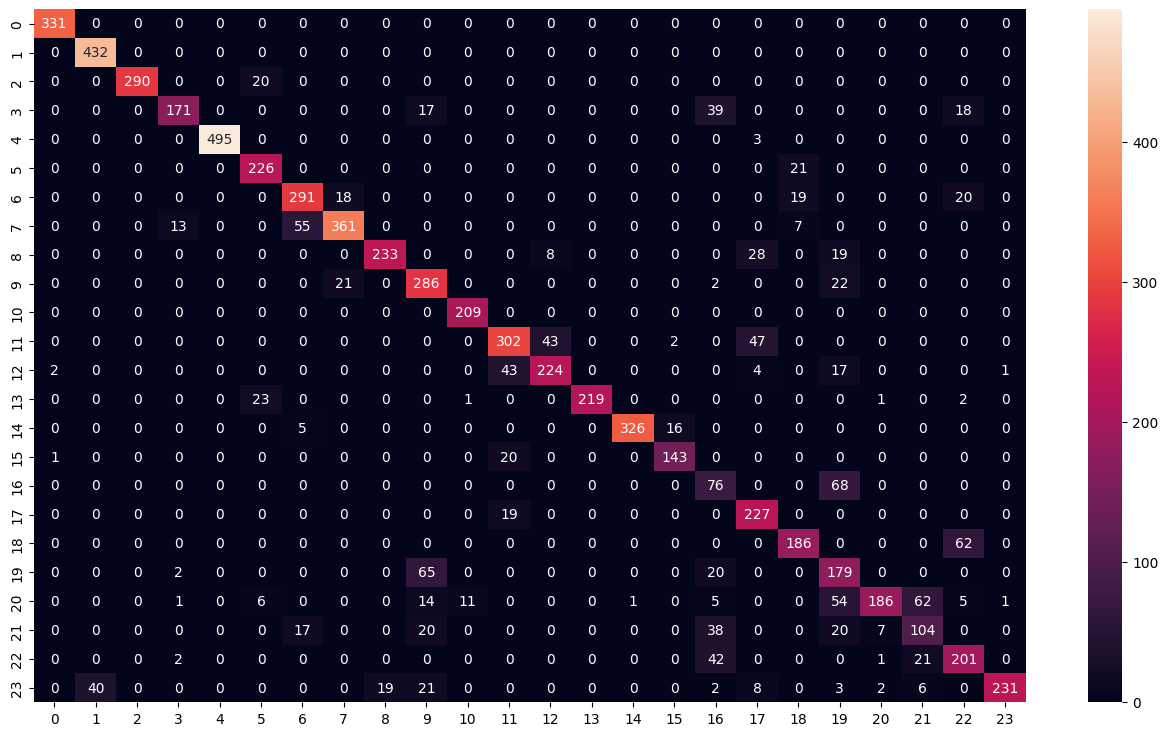

In [25]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted))
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predicted))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predicted,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predicted,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predicted,average='micro'))*100)
print('\n')

print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (16,9))
sns.heatmap(cm, annot = True, fmt = 'g')

In [26]:
test_predictions = (y_predicted).tolist()
test_alphabets = pd.Series((test_predictions))

In [27]:
test_dataset_final = pd.concat([test,test_alphabets],axis = 1)
test_dataset_final.columns.values[784] = 'Predicted_Labels'

In [28]:
test_dataset_final.to_csv('/kaggle/working/Processed_Test_Data.csv', index = False)

#### REAL TIME TEST

In [29]:
real_test = pd.read_csv('/kaggle/working/Processed_Test_Data.csv')
real_test.head(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Predicted_Labels,0
0,6,149,149,150,150,150,151,151,150,151,...,148,127,89,82,96,106,112,120,107,6
1,5,126,128,131,132,133,134,135,135,136,...,104,194,183,186,184,184,184,182,180,5
2,10,85,88,92,96,105,123,135,143,147,...,166,242,227,230,227,226,225,224,222,10
3,0,203,205,207,206,207,209,210,209,210,...,248,247,248,253,236,230,240,253,255,0
4,3,188,191,193,195,199,201,202,203,203,...,40,64,48,29,46,49,46,46,53,17
5,21,72,79,87,101,115,124,131,135,139,...,189,192,193,194,194,194,195,195,194,22
6,10,93,100,112,118,123,127,131,133,136,...,175,177,178,180,180,181,181,181,183,10
7,14,177,177,177,177,177,178,179,179,178,...,223,224,224,223,221,221,221,220,219,14
8,3,191,194,196,198,201,203,204,205,205,...,57,78,64,47,62,65,62,62,68,17
9,7,171,172,172,173,173,173,173,173,172,...,199,198,196,195,194,183,85,65,124,7


In [30]:
real_test.tail(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Predicted_Labels,0
7122,7,176,178,180,181,183,184,185,186,186,...,197,195,192,179,151,122,104,89,77,7
7123,13,191,192,193,192,191,192,193,195,193,...,67,116,222,206,230,216,152,94,114,13
7124,10,64,65,67,70,75,79,85,95,104,...,113,98,94,145,186,190,191,192,193,10
7125,23,170,170,171,169,170,171,171,170,168,...,34,27,46,30,29,27,28,25,98,23
7126,8,194,194,194,194,195,194,197,167,139,...,120,105,76,53,50,45,42,46,41,8
7127,10,47,72,79,84,89,95,103,113,121,...,26,26,116,201,208,207,207,206,205,10
7128,3,134,137,139,141,143,145,146,147,148,...,28,34,27,30,31,37,36,28,33,3
7129,21,145,148,152,155,158,159,162,163,164,...,194,194,194,193,192,190,188,189,187,21
7130,7,185,191,197,203,207,210,213,216,217,...,255,255,255,255,255,253,250,251,251,7
7131,0,154,156,160,162,163,165,166,170,169,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def predict_alphabet(int):
    pixels = np.array(real_test.iloc[int,1:785])
    cap = real_test.iloc[int,0]
    predicted_cap = real_test.iloc[int,785]
    plt.imshow(pixels.reshape(28,28,1))
    plt.xlabel('Actual Alphabet : ' + str(cap) + ' Predicted_Alphabet : ' + str(predicted_cap))
    plt.show

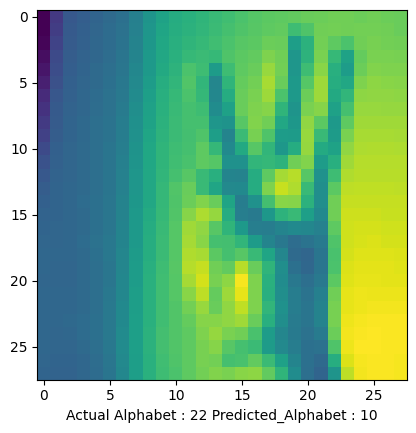

In [32]:
predict_alphabet(16)

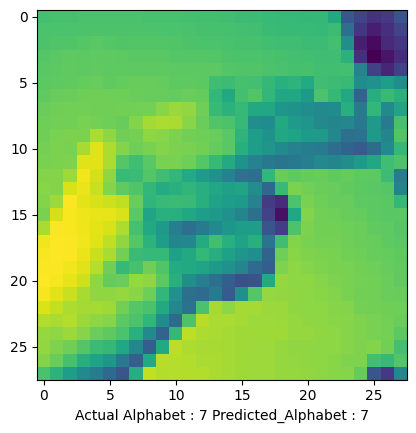

In [33]:
predict_alphabet(9)

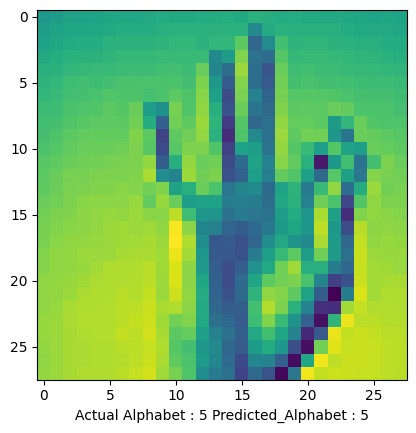

In [34]:
predict_alphabet(45)

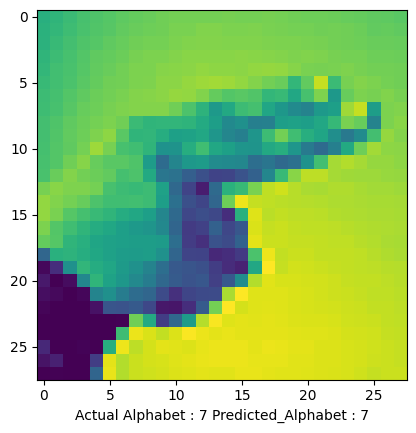

In [35]:
predict_alphabet(4500)

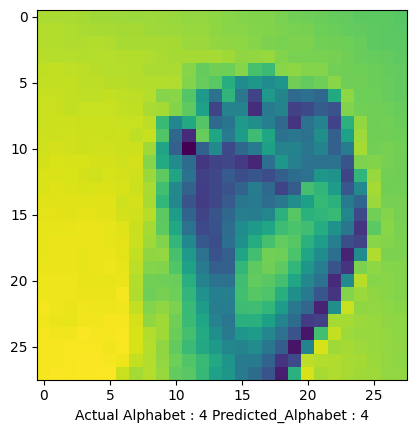

In [36]:
predict_alphabet(6660)

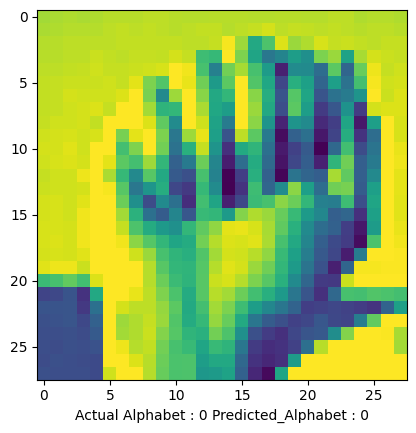

In [37]:
predict_alphabet(3678)

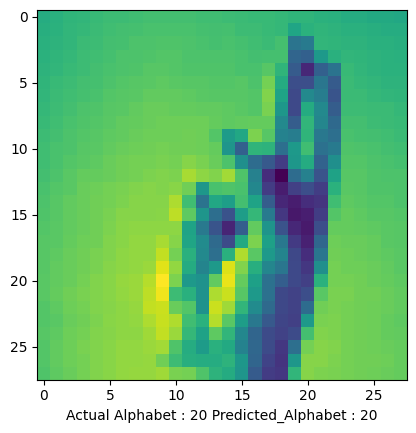

In [38]:
predict_alphabet(5902)

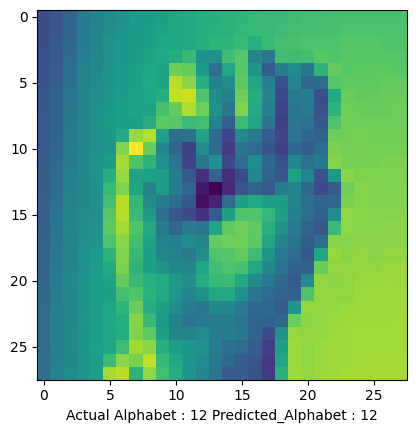

In [39]:
predict_alphabet(4879)

#### SAVING THE MODEL

In [40]:
pickle.dump(sign_alphabet_detector ,open('/kaggle/working/sign_language_detector.pkl','wb'))